# Unified UpLabel Pipeline

Testing ground for unified labeling pipeline.

In [2]:
import pandas as pd
import configparser
import sys

sys.path.append('../code')
import main
import utils as ut
import complexity as cp
import split as sp

In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
config = configparser.ConfigParser()
config.read('../config.ini', encoding='utf-8')

['../config.ini']

In [5]:
data_dir = config['path']['data']

## Input 
Parameters & Upload.
- File (Raw Data + expert labelled)
- Column names
- Extra columns (to be ingored in processing, but output)
- Target column
- Language
- Task Type
- N# labelers (0..*)
- Quality: strict/easy (strict considers tags)

In [17]:
df = pd.read_csv(data_dir+'lab/input.txt', sep='\t', encoding='utf-8')
df.columns

Index(['label', 'text', 'tag'], dtype='object')

In [18]:
df.head()

,label,text,tag
0,Sport,21-Jähriger fällt wohl bis Saisonende aus. Wie...,NaN
1,Kultur,"'Erfundene Bilder zu Filmen, die als verloren ...",NaN
2,Web,Der frischgekürte CEO Sundar Pichai setzt auf ...,NaN
3,Wirtschaft,"Putin: ""Einigung, dass wir Menge auf Niveau vo...",NaN
4,Inland,Estland sieht den künftigen österreichischen P...,NaN


## Prepare Data

- Unified format
- remove duplicates
- Warning message for unknown items
- handle tags

In [6]:
%%time

ul = main.Main('tal', debug_iter_id=0)

[INFO] **** ITERATION # 0 ****
[INFO] Input Length -> 7766
[INFO] Label Summary: 
gracePeriodDate    47
None               28
damageDate         19
documentDate        7
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 3806
[INFO] Not enough examples for label ('documentDate', 5)
	[INFO] Found an empty row during text cleaning.
[INFO] Estimating complexity using UNSUPERVISED approach.
	[INFO] Complexity Score -> 0.5021405701489349

[INFO] Applying model to data
	[INFO] Found an empty row during text cleaning.
[INFO] Storing split: C:/Users/makayser/Desktop/ul_local/tal/input-it_0-split_1.xlsx
None    465
Name: pred, dtype: int64
[INFO] Storing split: C:/Users/makayser/Desktop/ul_local/tal/input-it_0-split_2.xlsx
None    483
Name: pred, dtype: int64
Wall time: 8.57 s


[INFO] **** ITERATION # 1 ****
[INFO] Loading splits from iteration 0.
[INFO] Input Length -> 10287
[INFO] Label Summary: 
Panorama         375
Web              335
Wirtschaft       213
Sport            190
International    173
Inland            99
Etat              64
Wissenschaft      62
Kultur            31
Name: label, dtype: int64
[INFO] Post Duplicate Length -> 9249
	[INFO] Found an empty row during text cleaning.

[INFO] Estimating complexity using SUPERVISED approach.
	[INFO] Data available for training -> 1390


C:\ProgramData\Anaconda3\envs\uplab\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


	[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.42      1.00      0.59        69
           1       0.89      0.84      0.86        61
           2       0.93      0.35      0.51        37
           3       1.00      0.82      0.90        34
           4       1.00      0.19      0.32        31
           5       1.00      0.18      0.30        17
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        10
           8       0.00      0.00      0.00         5

   micro avg       0.62      0.62      0.62       274
   macro avg       0.58      0.38      0.39       274
weighted avg       0.73      0.62      0.58       274

	[INFO] Complexity Score -> 0.6204379562043796

[INFO] Applying model to data
	[INFO] Found an empty row during text cleaning.
[INFO] Storing split: C:/Users/makayser/Desktop/git/uplabel/data/lab/input-it_1-split_1.xlsx
Panorama         335
Web           

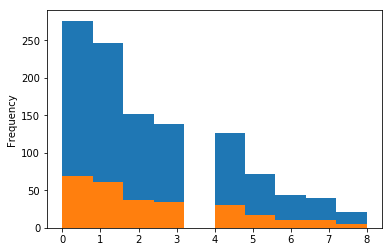

In [50]:
%%time

ul = main.Main('lab', debug_iter_id=1)

In [11]:
%%time

ul = main.Main('tal', debug_iter_id=2)

## Estimate Complexity

1. Rule based: minimume requirement per category
2. Spread: Oversampling (SMOTE) or Undersampling?
3. Complexity: preprocessing + supervised (simple TFIDF?)
4. Complexity Score: performance * data quantity   
-- Higher = better

[INFO] Not enough examples for label ('documentDate', 5)
[INFO] Estimating complexity.
[INFO] Data available for training -> 74
[INFO] Complexity Estimation Report: 
               precision    recall  f1-score   support

           0       0.80      0.80      0.80         5
           1       1.00      0.75      0.86         4
           2       0.67      0.67      0.67         3
           3       0.00      0.00      0.00         1

   micro avg       0.69      0.69      0.69        13
   macro avg       0.62      0.55      0.58        13
weighted avg       0.77      0.69      0.73        13



0.6923076923076923

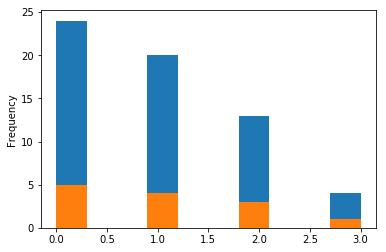

In [10]:
cp.run(df_data, estimate_clusters=False)

## Cluster
Only applies if complexity calculation not sufficient.

1. LDA / K-means

## Determine Split
Overlap

In [38]:
sp.calculate_split(3806, 0.73, 10)

(10, 0.27)

In [46]:
# splits = sp.apply_split(df_all, '../raw.txt', complexity=0.6, labelers=1)

## Output Split
- Split (x exports)
- Include extra columns
- Include label columns: scored, label, comment

### Output Instructions

- Labels:  
-- as defined   
-- None is 'None'  